### Урок 8. Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import r2_score
from scipy.spatial import distance
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Итарации закончились на шаге 7404, R2_score=0.581898, distance=0.000200


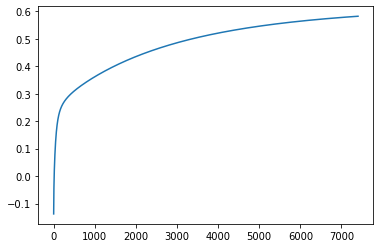

In [4]:
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.000001, fit_intercept=True, random_state=42)
w_current  = np.random.random(X_train.shape[1])
epsilon = 0.0002
weight_evolution, r2_evolution = [], [] # изменения весов и ошибка на валидации
for step in list(range(10000)):
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_))
    if weight_evolution[-1]<epsilon:
        break
    r2_evolution.append(r2_score(y_test, sgd_regressor.predict(X_test)))
    w_current = sgd_regressor.coef_.copy()
print("Итарации закончились на шаге %d, R2_score=%f, distance=%f" % (step
            , r2_score(y_test, sgd_regressor.predict(X_test)), weight_evolution[-1]) )
plt.plot(range(len(r2_evolution)), r2_evolution)

In [5]:
sgd1 = SGDRegressor(learning_rate='constant', max_iter=10000, eta0=0.000001 ,fit_intercept=True, random_state=42)
sgd1.fit(X_train, y_train)
print('R2_score =', r2_score(y_test, sgd1.predict(X_test)) )

R2_score = 0.11683982934533543


Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.